<a href="https://colab.research.google.com/github/Sjing2/SJ_project/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%5B%EC%A0%84%EC%B2%98%EB%A6%AC%5D_%ED%99%94%EC%9E%A5_%EC%A0%84%ED%9B%84%EC%82%AC%EC%A7%84_%EB%B0%98%EC%9C%BC%EB%A1%9C_%EB%82%98%EB%88%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#드라이브 mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import cv2
import os
import csv

# 화장 전후 사진 나누기

In [ ]:
def add_blank(image):
    height = image.shape[0]
    width = image.shape[1]
    square = np.zeros((max(height, width), max(height, width), 3))
    if height > width:
        square[:, (height-width)//2:(height-width)//2 + width, :] = image
    else:
        square[(width-height)//2:(width-height)//2 + height, :, :] = image
    return square

keywords = ["[크롤링]화장 전후"] # 폴더명 모두 기재 #사진을 반으로 나누는 코드가 포함되어 있어서 전후가 한꺼번에 나와있는 사진 폴더만 리스트에 담음


for keyword in keywords:
    path_dir = '/content/drive/My Drive/[github] 프로젝트 코드 정리/{}'.format(keyword)
    file_list = os.listdir(path_dir)
    before = np.zeros((len(file_list), 150, 150, 3))
    after = np.zeros((len(file_list), 150, 150, 3))

    for i, v in enumerate(file_list):
        img = pilimg.open("/content/drive/My Drive/[github] 프로젝트 코드 정리/{0}/{1}".format(keyword, v))
        pix = np.array(img)
        n_half = pix.shape[1] // 2
        bef = pix[:,:n_half,:]
        aft = pix[:,n_half:,:]   #이미지를 bef, aft로 분할

        # 공백 추가
        bef = add_blank(bef)
        aft = add_blank(aft)  # 직사각형 bef, aft를 검은 공백을 추가해 정사각형으로 변형 (비율 왜곡 방지 위함)

        # resize
        bef = cv2.resize(bef, (150, 150))  
        aft = cv2.resize(aft, (150, 150)) #이미지 사이즈 통일을 위해 각각의 사진들 일괄 리사이즈 


        before[i,:,:,:] = bef  #before안에 각각의 사진 넣기 
        after[i,:,:,:] = aft

        np.save("/content/drive/My Drive/[github] 프로젝트 코드 정리/{}_before.npy".format(keyword), before)
        np.save("/content/drive/My Drive/[github] 프로젝트 코드 정리/{}_after.npy".format(keyword), after)

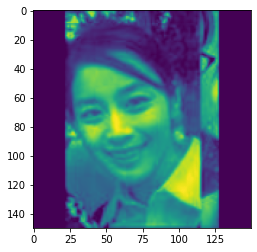

In [ ]:
plt.imshow(before[5,:,:,0])